In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_internship_data (1).csv to final_internship_data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('final_internship_data (1).csv')
df.head()


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


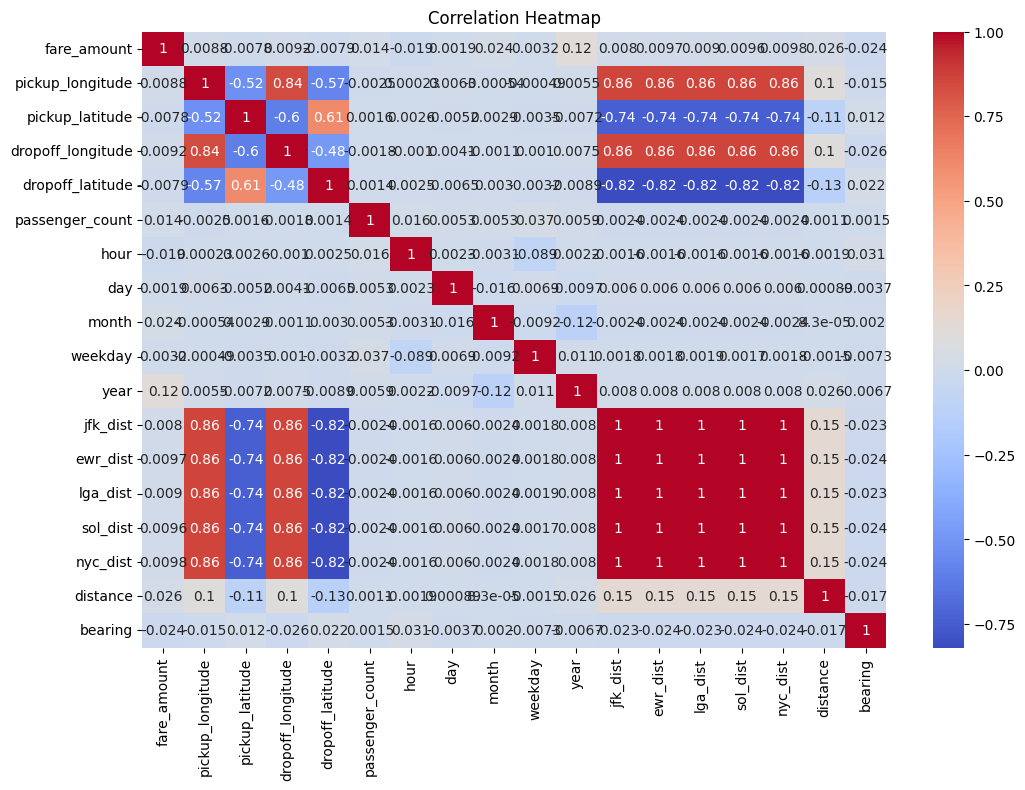

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


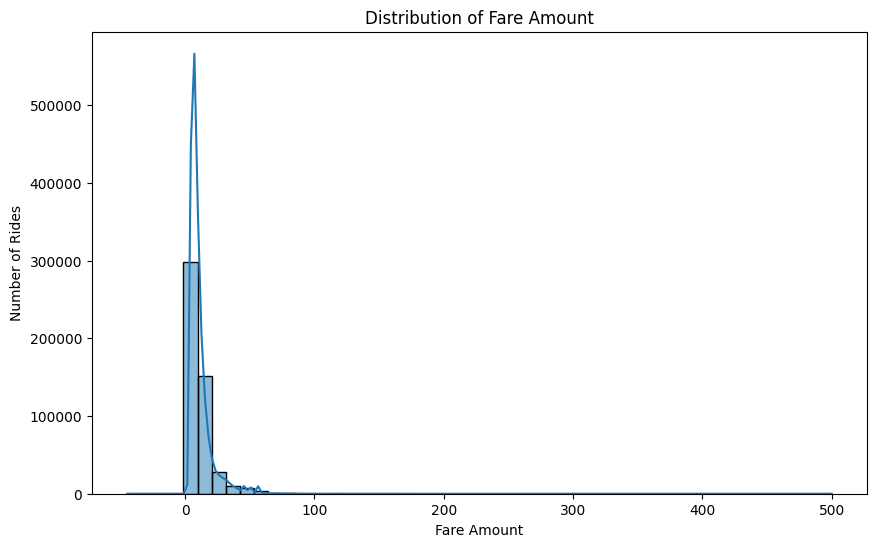

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Number of Rides')
plt.show()


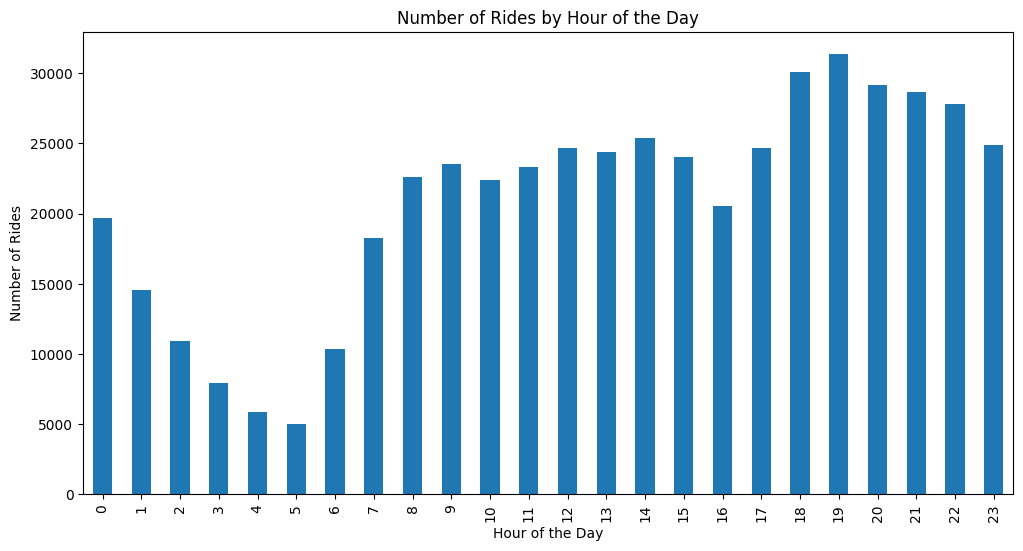

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


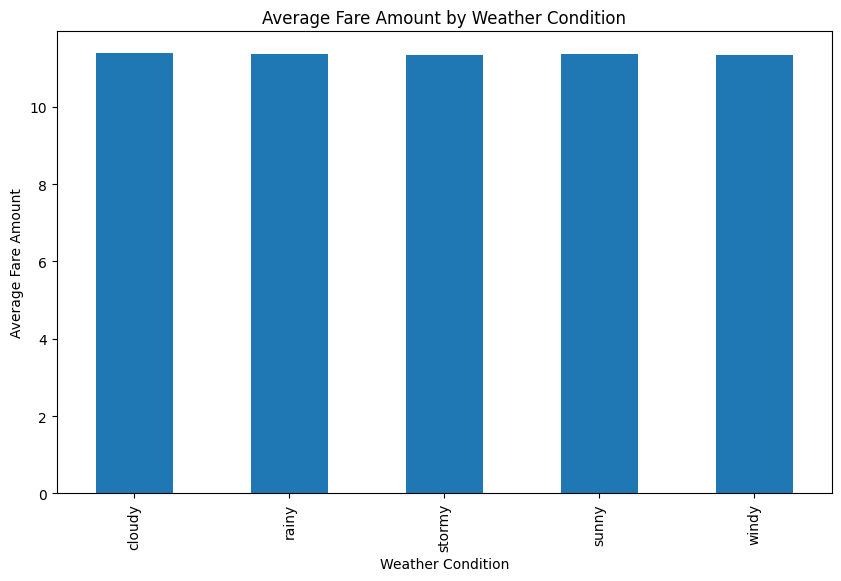

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Weather')['fare_amount'].mean().plot(kind='bar')
plt.title('Average Fare Amount by Weather Condition')
plt.ylabel('Average Fare Amount')
plt.xlabel('Weather Condition')
plt.show()



/tmp/ipython-input-4-4176705831.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('distance_bin')['fare_amount'].mean().plot(kind='bar')


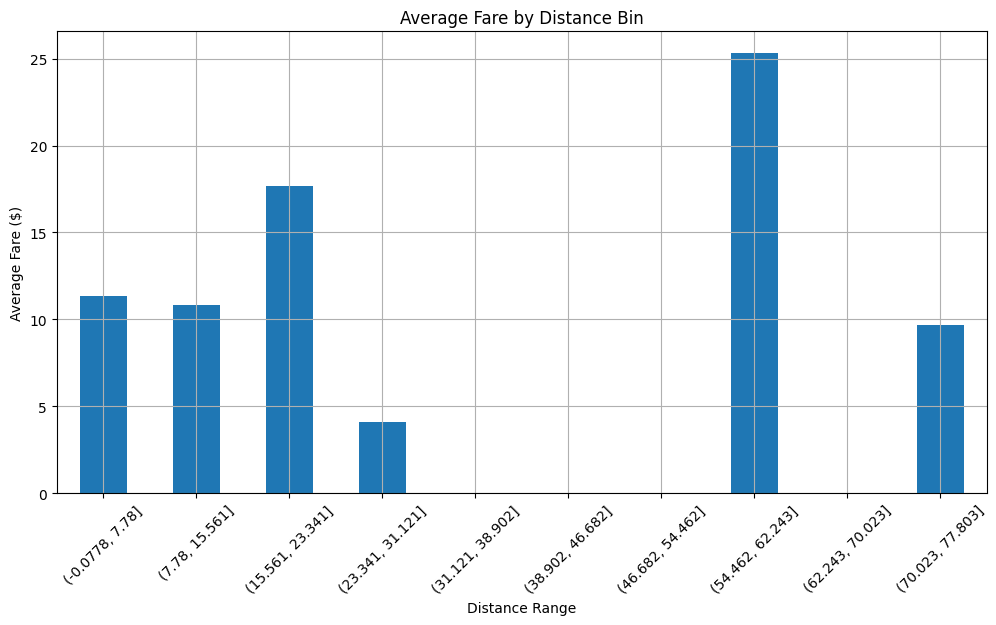

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_internship_data (1).csv')

df['distance'] = ((df['dropoff_longitude'] - df['pickup_longitude'])**2 +
                  (df['dropoff_latitude'] - df['pickup_latitude'])**2)**0.5

df['distance_bin'] = pd.cut(df['distance'], bins=10)

plt.figure(figsize=(12, 6))
df.groupby('distance_bin')['fare_amount'].mean().plot(kind='bar')
plt.title('Average Fare by Distance Bin')
plt.xlabel('Distance Range')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


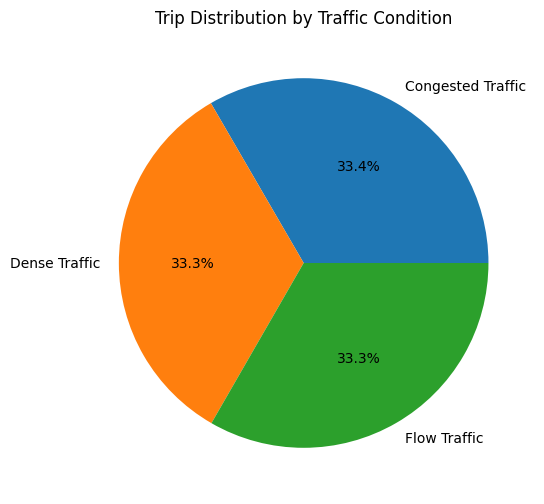

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Traffic Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Trip Distribution by Traffic Condition')
plt.ylabel('')
plt.show()



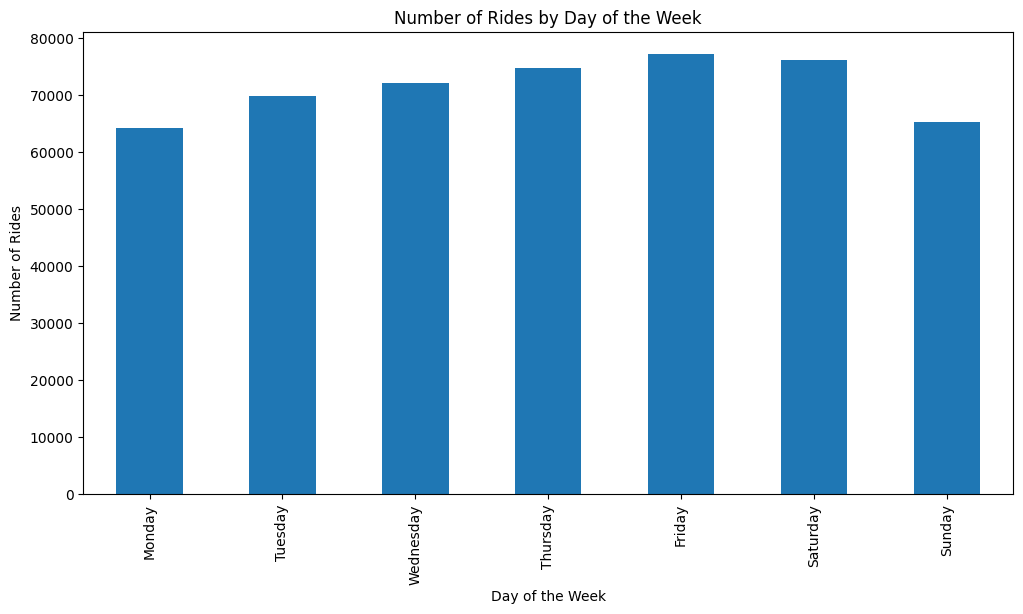

In [9]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12,6))
df['weekday'].value_counts().sort_index().plot(kind='bar')
plt.xticks(range(7), weekday_names)
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


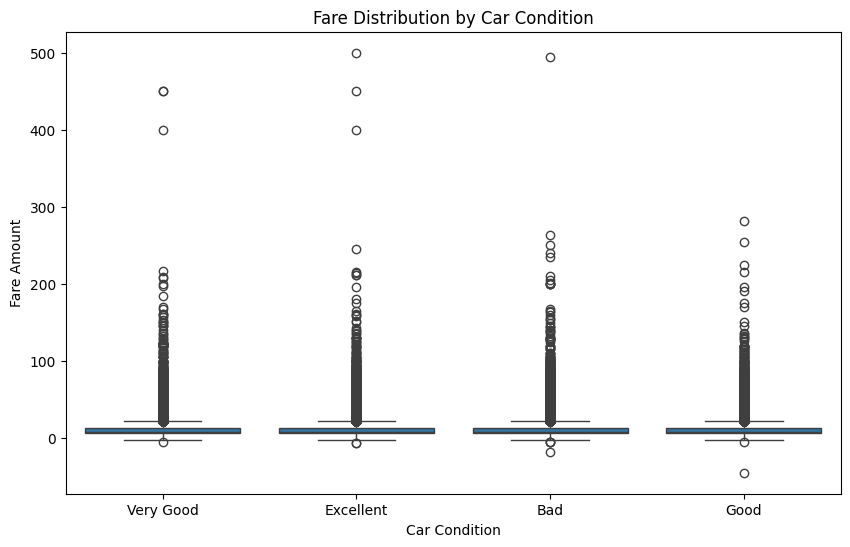

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Car Condition', y='fare_amount', data=df)
plt.title('Fare Distribution by Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')
plt.show()


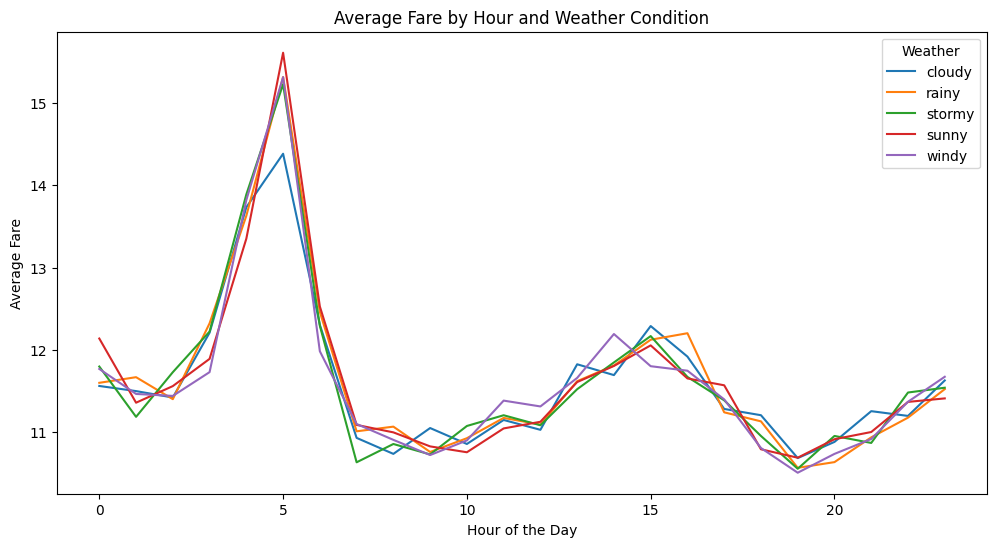

In [14]:
analysis = df.groupby(['hour', 'Weather'])['fare_amount'].mean().unstack()
analysis.plot(figsize=(12, 6))
plt.title('Average Fare by Hour and Weather Condition')
plt.ylabel('Average Fare')
plt.xlabel('Hour of the Day')
plt.show()

